In [9]:
# Imports and settings
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# SVM and Random Forest classification with metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

DATA_PATH = '../../data/base.csv'
TARGET_COL = 'target'

assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"
df = pd.read_csv(DATA_PATH)

numerical_cols = ['age', 'trestbps', 'cholesterol','max heart rate', 'oldpeak']
categorical_cols = ['sex', 'Chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

print(f"Shape: {df.shape}")
df.head()

Shape: (1763, 12)


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In [10]:
# Print all duplicated rows (all copies)
num_duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {num_duplicates}")

dupes_all = df[df.duplicated(keep=False)]
print(f"Total duplicate rows (all copies): {dupes_all.shape[0]}")
if dupes_all.shape[0] > 0:
    display(dupes_all)


Duplicate rows: 272
Total duplicate rows (all copies): 544


,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
663,49,0,2,110,208,0,0,160,0,0.0,1,0
736,49,0,2,110,208,0,0,160,0,0.0,1,0
1129,58,1,3,150,219,0,1,118,1,0.0,2,1
1177,58,1,3,150,219,0,1,118,1,0.0,2,1
1190,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1729,42,1,3,130,180,0,0,150,0,0.0,1,0
1730,61,1,4,140,207,0,2,138,1,1.9,1,1
1731,66,1,4,160,228,0,2,138,0,2.3,1,0
1732,46,1,4,140,311,0,0,120,1,1.8,2,1


### SVM and RandomForest with/without Duplications 

In [11]:
# Prepare features and target
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'F1': f1_score(y_test, y_pred_svm, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_svm, multi_class='ovr', average='weighted')
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1': f1_score(y_test, y_pred_rf, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_rf, multi_class='ovr', average='weighted')
}

# Print results
print("=== SVM and RandomForest with Duplications ===")
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

=== SVM and RandomForest with Duplications ===

SVM Results:
Accuracy: 0.6997
Precision: 0.6528
Recall: 0.6997
F1: 0.6750
AUC-ROC: 0.7762

Random Forest Results:
Accuracy: 0.6487
Precision: 0.6327
Recall: 0.6487
F1: 0.6402
AUC-ROC: 0.6708


In [12]:
# Remove duplicate rows
df_nodup = df.drop_duplicates()

# Prepare features and target
X_nodup = df_nodup.drop(columns=[TARGET_COL])
y_nodup = df_nodup[TARGET_COL]

# Train/test split
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X_nodup, y_nodup, test_size=0.2, random_state=42, stratify=y_nodup)

# Scale features
scaler_nd = StandardScaler()
X_train_nd_scaled = scaler_nd.fit_transform(X_train_nd)
X_test_nd_scaled = scaler_nd.transform(X_test_nd)

results_nd = {}

# SVM
svm_nd = SVC(probability=True, random_state=42)
svm_nd.fit(X_train_nd_scaled, y_train_nd)
y_pred_svm_nd = svm_nd.predict(X_test_nd_scaled)
y_proba_svm_nd = svm_nd.predict_proba(X_test_nd_scaled)
results_nd['SVM'] = {
    'Accuracy': accuracy_score(y_test_nd, y_pred_svm_nd),
    'Precision': precision_score(y_test_nd, y_pred_svm_nd, average='weighted'),
    'Recall': recall_score(y_test_nd, y_pred_svm_nd, average='weighted'),
    'F1': f1_score(y_test_nd, y_pred_svm_nd, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test_nd, y_proba_svm_nd, multi_class='ovr', average='weighted')
}

# Random Forest
rf_nd = RandomForestClassifier(random_state=42)
rf_nd.fit(X_train_nd, y_train_nd)
y_pred_rf_nd = rf_nd.predict(X_test_nd)
y_proba_rf_nd = rf_nd.predict_proba(X_test_nd)
results_nd['Random Forest'] = {
    'Accuracy': accuracy_score(y_test_nd, y_pred_rf_nd),
    'Precision': precision_score(y_test_nd, y_pred_rf_nd, average='weighted'),
    'Recall': recall_score(y_test_nd, y_pred_rf_nd, average='weighted'),
    'F1': f1_score(y_test_nd, y_pred_rf_nd, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test_nd, y_proba_rf_nd, multi_class='ovr', average='weighted')
}

# Print results
print("=== SVM and RandomForest without Duplications ===")
for model, metrics in results_nd.items():
    print(f"\n{model} Results (No Duplicates):")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

=== SVM and RandomForest without Duplications ===

SVM Results (No Duplicates):
Accuracy: 0.6823
Precision: 0.6275
Recall: 0.6823
F1: 0.6534
AUC-ROC: 0.7966

Random Forest Results (No Duplicates):
Accuracy: 0.5753
Precision: 0.5652
Recall: 0.5753
F1: 0.5702
AUC-ROC: 0.6724


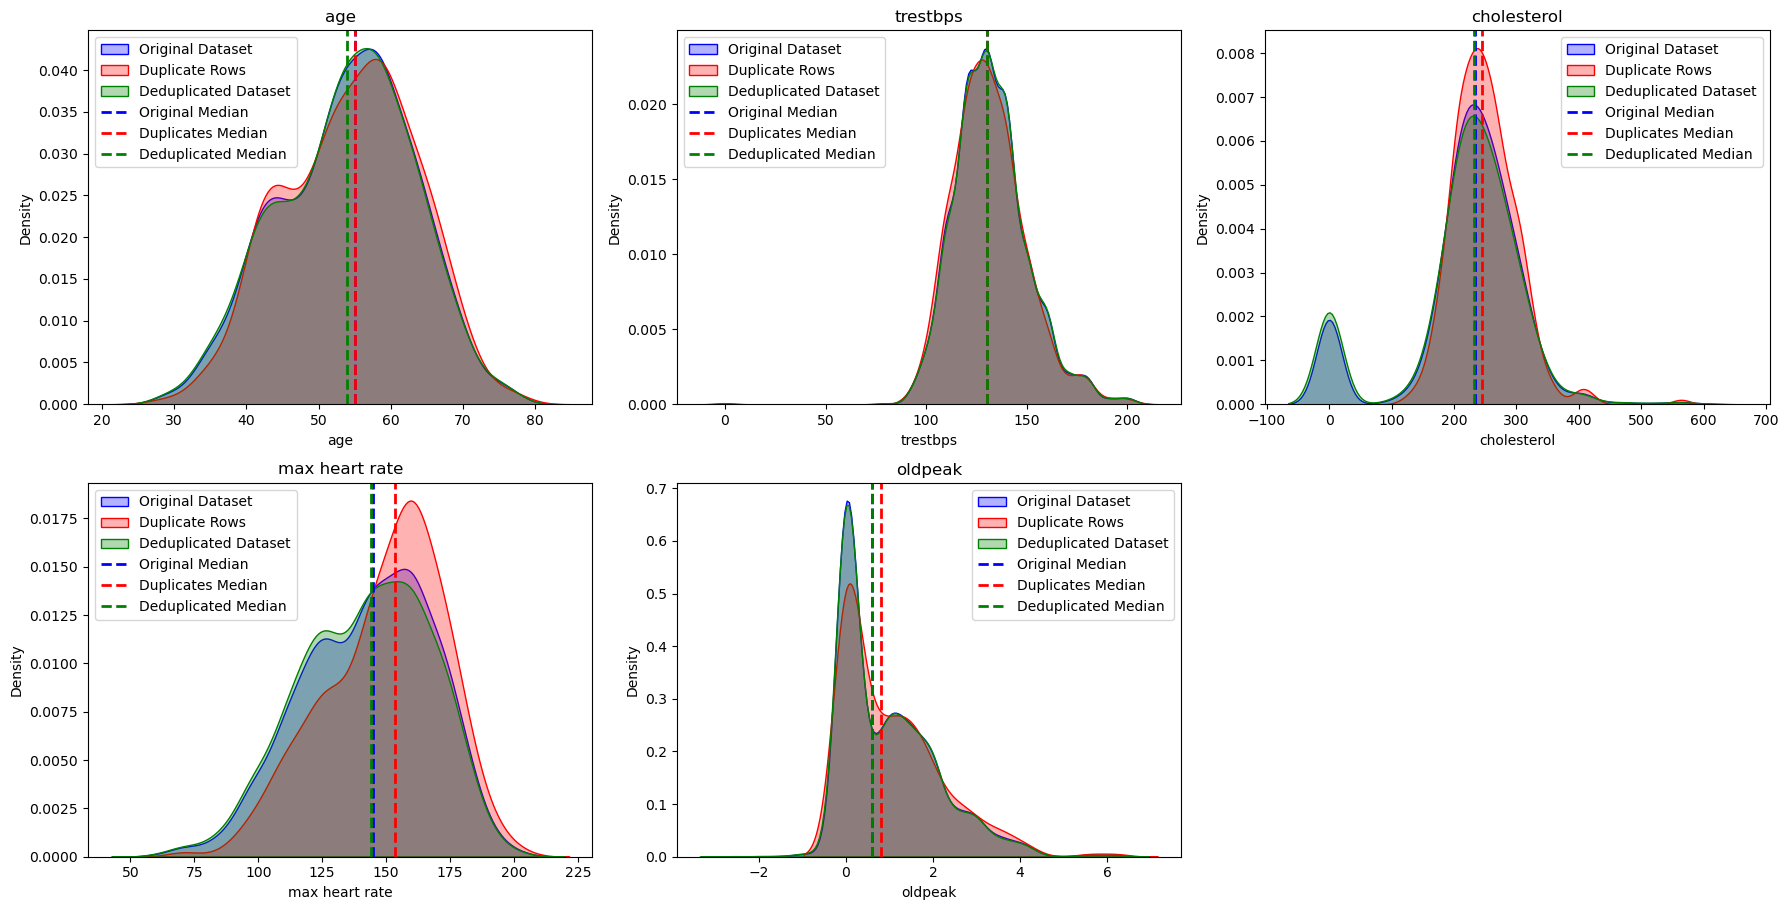

In [13]:
# Plot overlap distribution for all numerical columns with median lines (2x3 grid)
dupes_all = df[df.duplicated(keep=False)]
df_nodup = df.drop_duplicates()

num_cols_to_plot = numerical_cols
num_plots = len(num_cols_to_plot)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols_to_plot):
    ax = axes[i]
    sns.kdeplot(df[col], label='Original Dataset', color='blue', fill=True, alpha=0.3, ax=ax)
    sns.kdeplot(dupes_all[col], label='Duplicate Rows', color='red', fill=True, alpha=0.3, ax=ax)
    sns.kdeplot(df_nodup[col], label='Deduplicated Dataset', color='green', fill=True, alpha=0.3, ax=ax)
    
    # Median lines
    ax.axvline(df[col].median(), color='blue', linestyle='--', linewidth=2, label='Original Median')
    ax.axvline(dupes_all[col].median(), color='red', linestyle='--', linewidth=2, label='Duplicates Median')
    ax.axvline(df_nodup[col].median(), color='green', linestyle='--', linewidth=2, label='Deduplicated Median')
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()

# Hide unused subplots if any
for j in range(num_plots, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

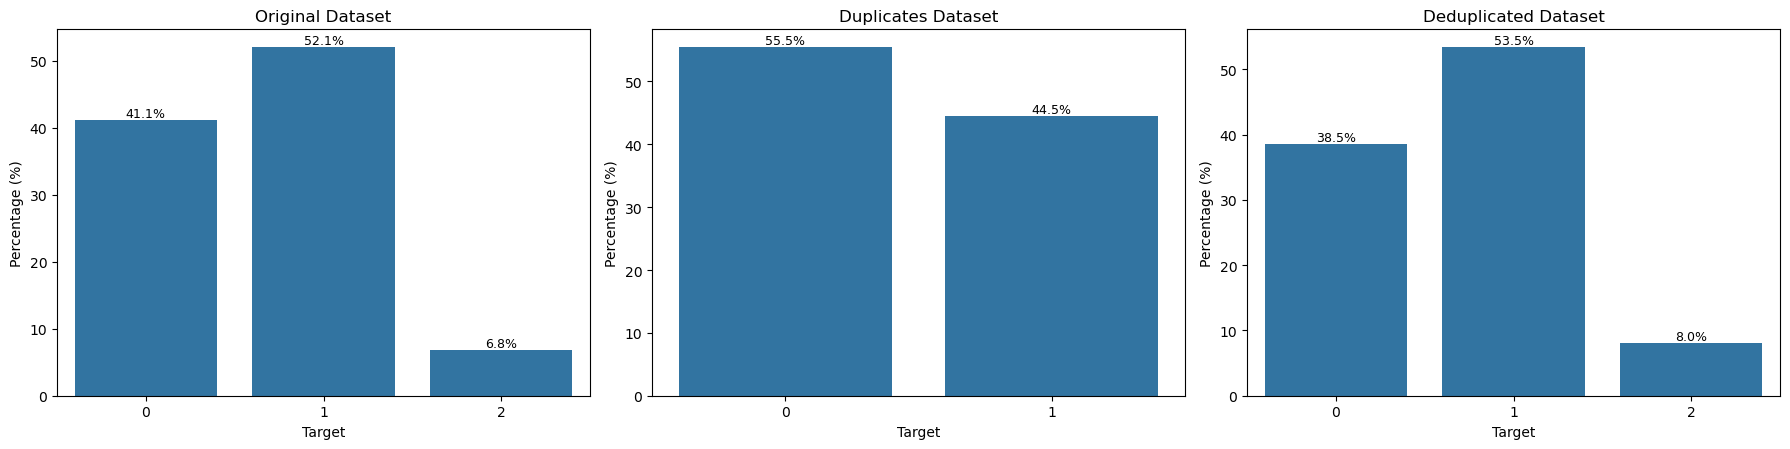

In [14]:
# Prepare the datasets
dupes_all = df[df.duplicated(keep=False)]
df_nodup = df.drop_duplicates()

datasets = {
    "Original": df,
    "Duplicates": dupes_all,
    "Deduplicated": df_nodup
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, dataset) in zip(axes, datasets.items()):
    if dataset.empty:
        ax.text(0.5, 0.5, 'No data',
                horizontalalignment='center',
                verticalalignment='center')
        ax.set_title(f"{name} Dataset")
        continue
    
    # Calculate proportions
    prop_df = dataset[TARGET_COL].value_counts(normalize=True).reset_index()
    prop_df.columns = [TARGET_COL, "Percentage"]
    prop_df["Percentage"] *= 100
    
    # Plot bars
    barplot = sns.barplot(data=prop_df, x=TARGET_COL, y="Percentage", ax=ax)
    
    # Add percentage labels on bars
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.1f%%", fontsize=9)
    
    ax.set_title(f"{name} Dataset")
    ax.set_xlabel("Target")
    ax.set_ylabel("Percentage (%)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


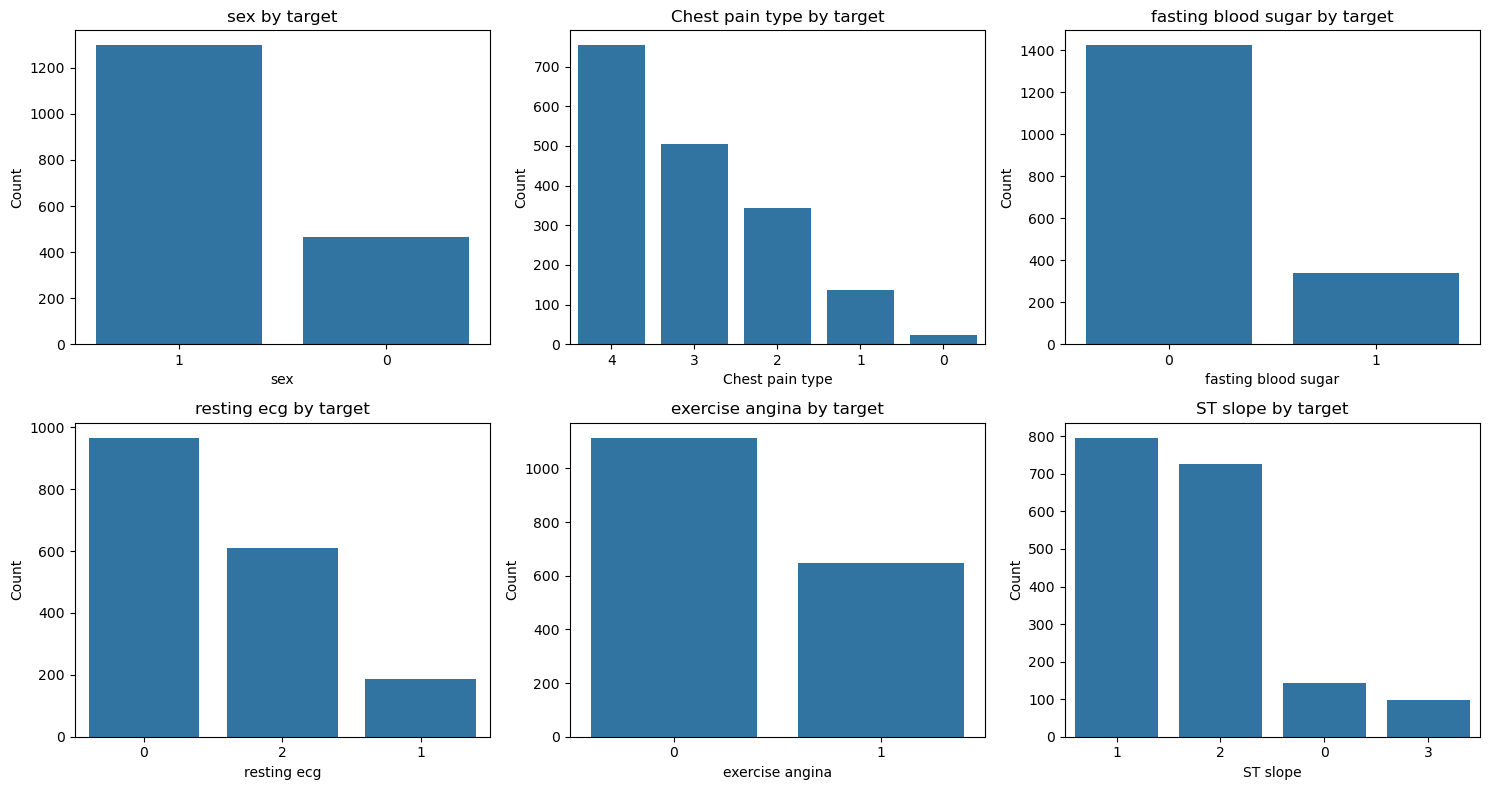

In [15]:
# Bar charts for categorical variables
if len(categorical_cols) == 0:
    print("No categorical columns to plot.")
else:
    cat_to_plot = categorical_cols
    
    n = len(cat_to_plot)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cat_to_plot):
        ax = axes[i]
        order = df[col].value_counts().index  # order by frequency
        sns.countplot(data=df, x=col, order=order, ax=ax)
        ax.set_title(f"{col} by {TARGET_COL}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

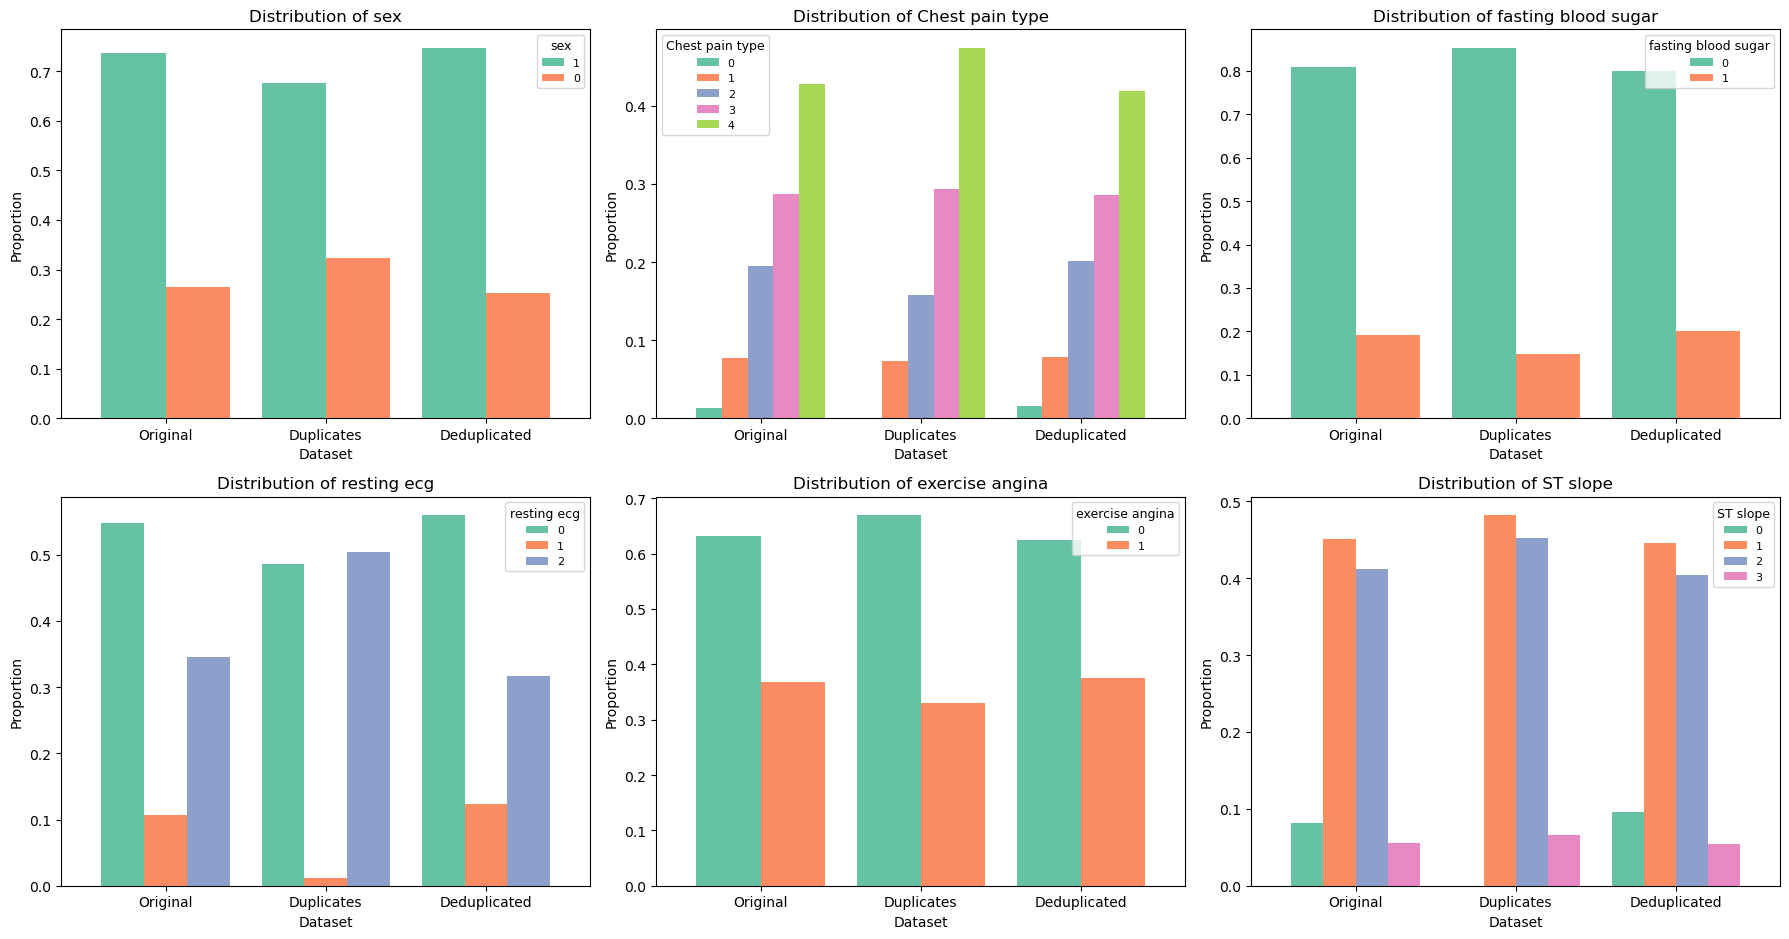

In [16]:
# Color palette for categories
palette = sns.color_palette("Set2")

datasets = {
    'Original': df,
    'Duplicates': dupes_all,
    'Deduplicated': df_nodup
}

ncols = 3
nrows = int(np.ceil(len(categorical_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Build proportions table (categories as columns, datasets as rows)
    prop_df = {}
    for name, dataset in datasets.items():
        if dataset.empty:
            continue
        prop_df[name] = dataset[col].value_counts(normalize=True)
    prop_df = pd.DataFrame(prop_df).T.fillna(0)  # rows = datasets, cols = categories

    # Plot grouped bars
    prop_df.plot(
        kind="bar",
        ax=axes[i],
        color=palette[:len(prop_df.columns)],  # use only as many colors as categories
        width=0.8
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Dataset")
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(title=col, fontsize=8, title_fontsize=9)

# Remove unused subplots if categorical_cols < nrows*ncols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
